# Normalizing flows comparison

## Goal - Compare the `average per sample mse loss` and `average per sample kl loss` to determine what flow depth to use for the planar flows

### Imports

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

### Check the validity of the dumped arrays by ensuring that all the samples used for testing are present in the validation for all the latent dimension tests

In [2]:
flow_depths = [16, 32, 64, 128, 256]
dumps = ["20190904_195916", "20190904_200224", "20190904_200414", "20190904_200523", "20190904_201753"]

# First check that all the indices from the test validation set exist in all the dumps

ldump_idx_arr = None

# Iterate over the dumps and check the indices
for flow_depth, dump in zip(flow_depths, dumps):
    print("----------------------------------------------------")
    print("Reading metrics from NF with flow depth = {0} :".format(flow_depth))
    print("----------------------------------------------------")
    
    dump_npz_path = "/home/akajal/WatChMaL/VAE/dumps/{0}/test_valid_iteration_metrics.npz".format(dump)
    dump_npz_arr = np.load(dump_npz_path)
    
    dump_indices = np.sort(dump_npz_arr["indices"])
    
    if ldump_idx_arr is not None:
        if not np.array_equal(dump_indices, ldump_idx_arr):
            print("Index array for flow depth = {0} not equal to all the other.".format(flow_depth))
        else:
            print("Index array equal to the first index array")
    else:
        ldump_idx_arr = dump_indices

----------------------------------------------------
Reading metrics from NF with flow depth = 16 :
----------------------------------------------------
----------------------------------------------------
Reading metrics from NF with flow depth = 32 :
----------------------------------------------------
Index array equal to the first index array
----------------------------------------------------
Reading metrics from NF with flow depth = 64 :
----------------------------------------------------
Index array equal to the first index array
----------------------------------------------------
Reading metrics from NF with flow depth = 128 :
----------------------------------------------------
Index array equal to the first index array
----------------------------------------------------
Reading metrics from NF with flow depth = 256 :
----------------------------------------------------
Index array equal to the first index array


### For each configuration of the flow depths, print the `average per sample mse loss` with its `standard deviation` and `standard error` and print the `average per sample kl loss` with its `standard deviation` and `standard error`

In [3]:
# Collect the metrics for plotting as well
recon_loss_values, kl_loss_values = [], []
recon_std_values, kl_std_values = [], []
recon_stderr_values, kl_stderr_values = [], []

# Iterate over the dumps and check the indices
for flow_depth, dump in zip(flow_depths, dumps):
    print("----------------------------------------------------")
    print("Reading metrics from NF with flow depth = {0} :".format(flow_depth))
    print("----------------------------------------------------")
    
    dump_npz_path = "/home/akajal/WatChMaL/VAE/dumps/{0}/test_valid_iteration_metrics.npz".format(dump)
    npz_arr = np.load(dump_npz_path)
    
    dump_recon_loss, dump_kl_loss = npz_arr["recon_loss"], npz_arr["kl_loss"]
    
    mean_recon_loss, std_recon_loss = np.mean(dump_recon_loss), np.std(dump_recon_loss)
    stderr_recon_loss = std_recon_loss/math.sqrt(dump_recon_loss.shape[0])
    
    recon_loss_values.append(mean_recon_loss)
    recon_std_values.append(std_recon_loss)
    recon_stderr_values.append(stderr_recon_loss)
    
    mean_kl_loss, std_kl_loss = np.mean(dump_kl_loss), np.std(dump_kl_loss)
    stderr_kl_loss = std_kl_loss/math.sqrt(dump_kl_loss.shape[0])
    
    kl_loss_values.append(mean_kl_loss)
    kl_std_values.append(std_kl_loss)
    kl_stderr_values.append(stderr_kl_loss)
    
    print("Recon Loss metrics")
    print("Mean Recon loss : {0}".format(mean_recon_loss))
    print("Std Recon loss : {0}".format(std_recon_loss))
    print("Stderr Recon loss : {0}\n".format(stderr_recon_loss))
    
    print("KL Loss metrics")
    print("Mean KL loss : {0}".format(mean_kl_loss))
    print("Std KL loss : {0}".format(std_kl_loss))
    print("Stderr KL loss : {0}".format(stderr_kl_loss))

----------------------------------------------------
Reading metrics from NF with flow depth = 16 :
----------------------------------------------------
Recon Loss metrics
Mean Recon loss : 17813.982421875
Std Recon loss : 16182.75390625
Stderr Recon loss : 17.070054629238776

KL Loss metrics
Mean KL loss : 191.0186767578125
Std KL loss : 179.25653076171875
Stderr KL loss : 0.18908516995791289
----------------------------------------------------
Reading metrics from NF with flow depth = 32 :
----------------------------------------------------
Recon Loss metrics
Mean Recon loss : 9893.6318359375
Std Recon loss : 7934.59326171875
Stderr Recon loss : 8.369647170251946

KL Loss metrics
Mean KL loss : 146.5789794921875
Std KL loss : 98.78563690185547
Stderr KL loss : 0.10420205536509801
----------------------------------------------------
Reading metrics from NF with flow depth = 64 :
----------------------------------------------------
Recon Loss metrics
Mean Recon loss : 10745.2841796875

### For each of the flow depths, plot the `average per sample mse loss` with its `stderr` as the error bar and plot the `average per sample kl loss` with its `stderr` as the error bar

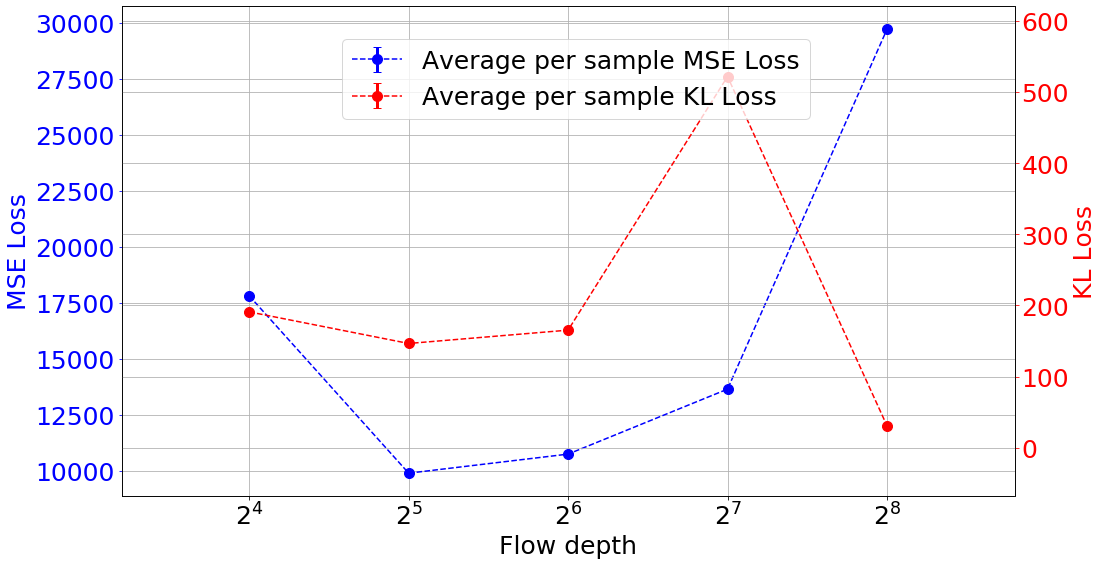

In [4]:
# Plot the metrics for the training subset

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(16,9))

# Set the x-axes ticks for the plot
ax1.set_xticks(flow_depths)

# Use the same x-axis to plot the KL loss
ax2 = ax1.twinx()

# Plot the MSE values collected above
ax1.errorbar(flow_depths, recon_loss_values, yerr=recon_stderr_values,
             linestyle='dashed', marker='o', markersize=10,
             elinewidth=3, capsize=4.0, color="blue",
             label="Average per sample MSE Loss")

# Plot the KL values collected above
ax2.errorbar(flow_depths, kl_loss_values, yerr=kl_stderr_values,
             linestyle='dashed', marker='o', markersize=10,
             elinewidth=3, capsize=4.0, color="red",
             label="Average per sample KL Loss")

# Setup plot characteristics
ax1.tick_params(axis="x", labelsize=25)
ax1.set_xlabel("Flow depth", fontsize=25)
ax1.set_xscale("log", basex=2)

ax1.set_ylabel("MSE Loss", fontsize=25, color="blue")
ax1.tick_params(axis="y", labelsize=25, colors="blue")

ax2.set_ylabel("KL Loss", fontsize=25, color="red")
ax2.tick_params(axis="y", labelsize=25, colors="red")

plt.margins(0.2)

ax1.grid(True)
ax2.grid(True)

ax1.set_facecolor('white')
ax2.set_facecolor('white')

lgd = fig.legend(prop={"size":25}, loc='center', bbox_to_anchor=(0.5, 0.75))
plt.savefig("figures/flow_depths_vs_mse_and_kl_loss.pdf", format="pdf", dpi=600, bbox_inches="tight")

### From here, we choose the model with flow depth = 32 as our reference mode

### On a per sample basis, compute the delta difference b/w the MSE Loss and KL Loss for that sample with a model with flow depth = `x` and the reference model

### Steps :
#### 1. Construct 5 dataframes (one for each flow depth)
#### 2. Sort the dataframes along the dataset index axis
#### 3. Calculate the delta difference for each of the dataframe w.r.t. the dataframe corresponding to the reference model
#### 4. Plot the delta difference values

### Construct 5 dataframes (one for each flow depth)

In [5]:
dump_dfs = []

# Iterate over the dumps and check the indices
for flow_depth, dump in zip(flow_depths, dumps):
    print("----------------------------------------------------")
    print("Reading metrics from NF with flow depth = {0} :".format(flow_depth))
    print("----------------------------------------------------")
    
    dump_npz_path = "/home/akajal/WatChMaL/VAE/dumps/{0}/test_valid_iteration_metrics.npz".format(dump)
    dump_npz_arr = np.load(dump_npz_path)
    
    dump_dfs.append(pd.DataFrame(data={"index":dump_npz_arr["indices"], "recon_loss":dump_npz_arr["recon_loss"],
                                       "kl_loss":dump_npz_arr["kl_loss"]}))
    
    print("Done.")

----------------------------------------------------
Reading metrics from NF with flow depth = 16 :
----------------------------------------------------
Done.
----------------------------------------------------
Reading metrics from NF with flow depth = 32 :
----------------------------------------------------
Done.
----------------------------------------------------
Reading metrics from NF with flow depth = 64 :
----------------------------------------------------
Done.
----------------------------------------------------
Reading metrics from NF with flow depth = 128 :
----------------------------------------------------
Done.
----------------------------------------------------
Reading metrics from NF with flow depth = 256 :
----------------------------------------------------
Done.


### Sort the dataframes along the index axis

In [6]:
for df in dump_dfs:
    df.sort_values(by="index", inplace=True)

### Set the index of the reference dataframe to use

In [7]:
ref_df_idx = 1

### Calculate the delta differenced values for each number of latent dimensions

In [8]:
for df in dump_dfs:
    df["delta recon_loss"] = df["recon_loss"].values - dump_dfs[ref_df_idx]["recon_loss"].values
    df["delta kl_loss"] = df["kl_loss"].values - dump_dfs[ref_df_idx]["kl_loss"].values

### Find the mean and stderr of the delta differenced values for each number of latent dimensions

In [9]:
delta_recon_mean, delta_kl_mean, delta_recon_stderr, delta_kl_stderr = [], [], [], []

for df in dump_dfs:
    delta_recon_loss, delta_kl_loss = df["delta recon_loss"], df["delta kl_loss"]
    
    delta_recon_mean.append(np.mean(delta_recon_loss.values))
    delta_kl_mean.append(np.mean(delta_kl_loss.values))
    
    delta_recon_stderr.append(np.std(delta_recon_loss.values)/math.sqrt(df["delta recon_loss"].values.shape[0]))
    delta_kl_stderr.append(np.std(delta_kl_loss.values)/math.sqrt(df["delta kl_loss"].values.shape[0]))

In [10]:
print(delta_recon_mean)
print(delta_kl_mean)

[7920.3486, 0.0, 851.6531, 3753.733, 19824.047]
[44.439686, 0.0, 18.751776, 375.28128, -115.59482]


In [11]:
print(delta_recon_stderr)
print(delta_kl_stderr)

[10.788942570956909, 0.0, 3.7039308023737147, 10.768544383399012, 28.195624980917728]
[0.11318529240670878, 0.0, 0.0719407320289731, 0.39421893099256716, 0.08409475244372669]


### Plot the delta differenced values collected above

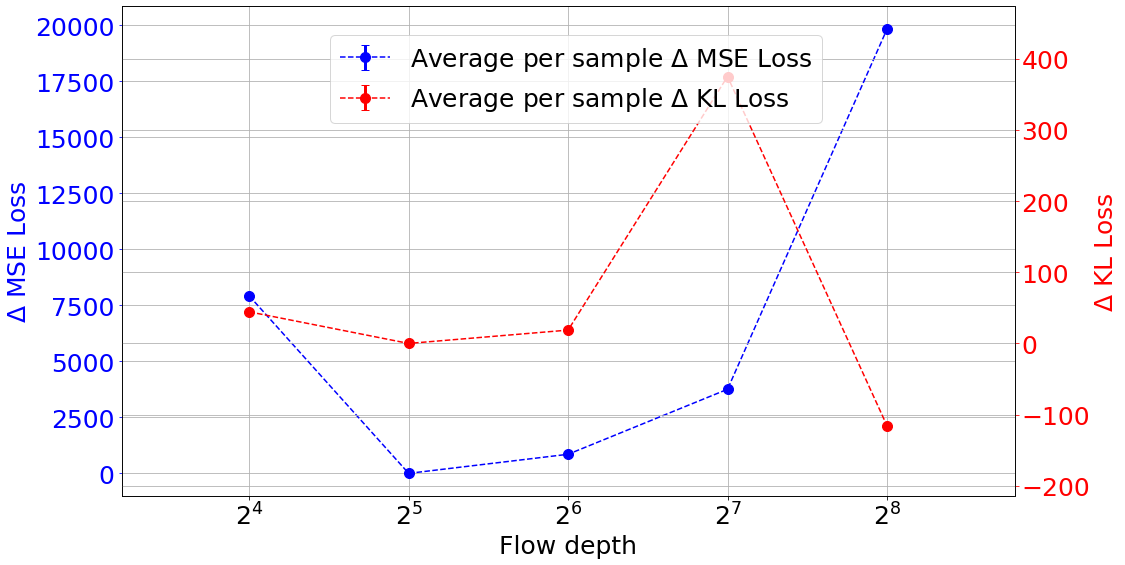

In [12]:
# Plot the metrics for the training subset

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(16,9))

# Set the x-axes ticks for the plot
ax1.set_xticks(flow_depths)

# Use the same x-axis to plot the KL loss
ax2 = ax1.twinx()

# Plot the MSE values collected above
ax1.errorbar(flow_depths, delta_recon_mean, yerr=delta_recon_stderr,
             linestyle='dashed', marker='o', markersize=10,
             elinewidth=3, capsize=4.0, color="blue",
             label=r"Average per sample $\Delta$ MSE Loss")

# Plot the KL values collected above
ax2.errorbar(flow_depths, delta_kl_mean, yerr=delta_kl_stderr,
             linestyle='dashed', marker='o', markersize=10,
             elinewidth=3, capsize=4.0, color="red",
             label=r"Average per sample $\Delta$ KL Loss")

# Setup plot characteristics
ax1.tick_params(axis="x", labelsize=25)
ax1.set_xlabel("Flow depth", fontsize=25)
ax1.set_xscale("log", basex=2)

ax1.set_ylabel(r"$\Delta$ MSE Loss", fontsize=25, color="blue")
ax1.tick_params(axis="y", labelsize=25, colors="blue")

ax2.set_ylabel(r"$\Delta$ KL Loss", fontsize=25, color="red")
ax2.tick_params(axis="y", labelsize=25, colors="red")

plt.margins(0.2)
ax1.grid(True)
ax2.grid(True)

lgd = fig.legend(prop={"size":25}, loc='center', bbox_to_anchor=(0.5, 0.75))
plt.savefig("figures/flow_depths_vs_delta_differenced_loss.pdf", format="pdf", dpi=600, bbox_inches="tight")